# Week2 Regression Analysis Assignment

By Xijian Lim

This assignment will be looking at the relationship between the hours reported playing video games and reports in having a headache. 

For this assignment I will be using the Addhealth Data set.

The variables used will be denoted by the code 'H1DA10' - How many hours a week doy ou play video or computergames?
as the Explanatory Variable, and the Reponse Variable will be denoted by the code 'H1GH2' - How often have you had a headache?

Because the of the way the Addhealth questionnaire was structured, the response variable will need to be filterd and recoded.

In [25]:
#importing packages and data


#!pip install statsmodels --upgrade
import numpy as numpyp
import pandas as pandas
import statsmodels.api
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
# bug fix for display formats to avoid run time errors
pandas.set_option('display.float_format', lambda x:'%.2f'%x)

#call in data set
data = pandas.read_csv('~/Desktop/Coursera - data science/regression modelling/addhealth_pds.csv', low_memory=True)



In [2]:
#partitioning explanatory and reponse variable to their own sub data sets
df=data[['H1DA10','H1GH2']].copy()

In [3]:
# convert variables to numeric format using convert_objects function
df['H1DA10'] = pandas.to_numeric(df['H1DA10'], errors='coerce')
df['H1GH2'] = pandas.to_numeric(df['H1GH2'], errors='coerce')

In [4]:
#renaming columns for easier reference

df.rename(columns={'H1DA10': 'video_game_hours', 'H1GH2': 'headache_freq'}, inplace=True)

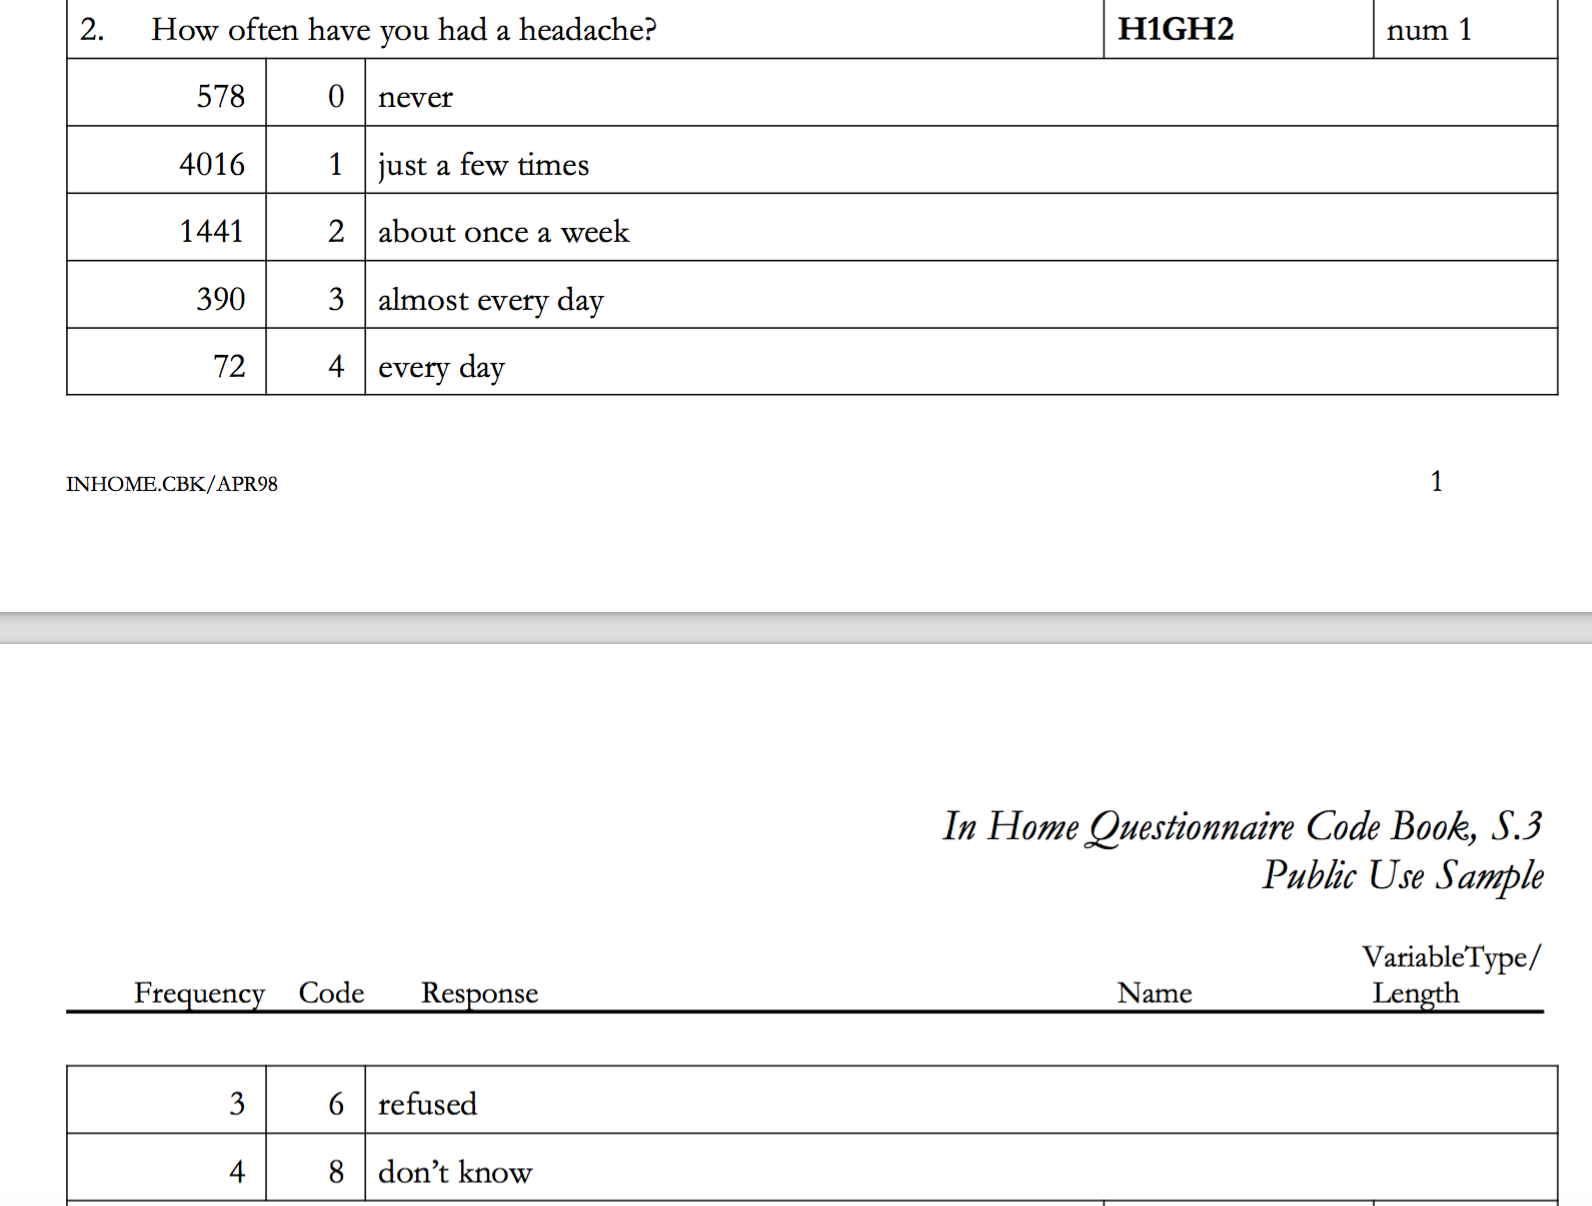

In [5]:
## Lets look at how the questionnaire was structured by first looking at the responses for the response variables
from IPython.display import Image
Image(filename='headache.png')

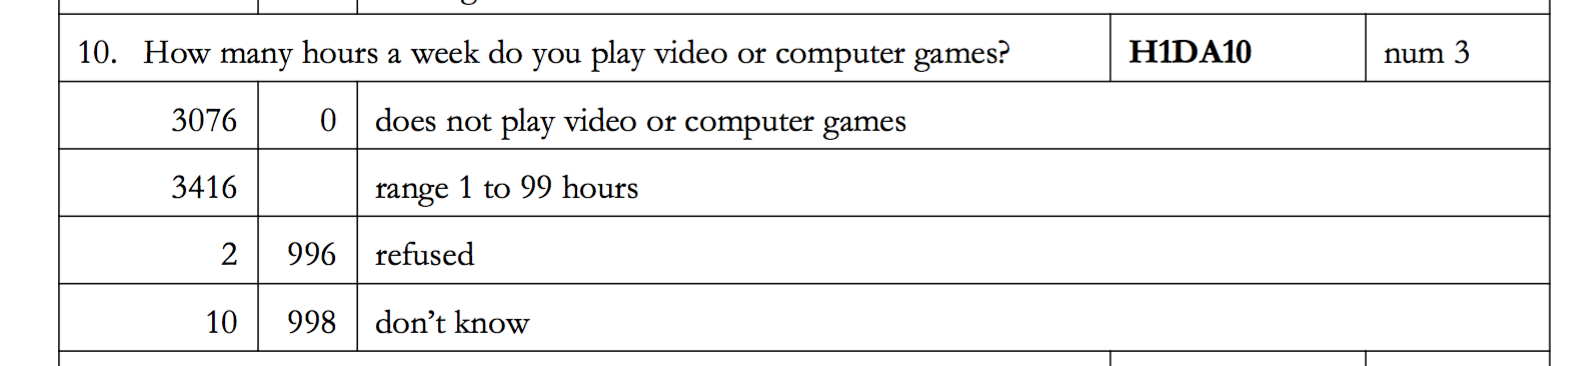

In [6]:
# and now the explanatory variables
## Lets look at how the questionnaire was structured by first looking at the responses for the response variables
from IPython.display import Image
Image(filename='videogames.png')

In [21]:
# we will need to clean the data

#filtering only reported hours of video games ie. less than 996 and greater than 0
df=df[(df['video_game_hours']<996) & df['video_game_hours']>0 ]

#filtering only people who reported having a headache
df=df[(df['headache_freq']<6)]


## NOTE because the freq of headache codes represent incrementally higher frequencies of reported headaches, it may be 
##interpreted as a 

In [44]:
# we will now centre the explanatory variable by subtracting each row by the mean
#mean=df['video_game_hours'].mean()

df['video_game_hours_mean']=df['video_game_hours'].subtract(df['video_game_hours'].mean())

In [45]:
mean

3.9643605870020964

In [46]:
df['video_game_hours_mean'].mean()

-2.2344111187424535e-17

In [47]:
# perfomring linear regression using statsmodel package

print('OLS regression for association between number of hours playing video games and reports on headache fre')
reg1 = smf.ols('headache_freq ~ video_game_hours_mean', data=df).fit()
print(reg1.summary())

OLS regression for association between number of hours playing video games and reports on headache fre
                            OLS Regression Results                            
Dep. Variable:          headache_freq   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.063
Date:                Sun, 15 Oct 2017   Prob (F-statistic):              0.303
Time:                        22:41:22   Log-Likelihood:                -2111.2
No. Observations:                1908   AIC:                             4226.
Df Residuals:                    1906   BIC:                             4238.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------

<br>
<br>
<br>
<br>
After running the stats model we can clearly see a significant association between the numberof hours playing video games and the severity of headaches

As shown by the F-values 1.063 p-values 0.303 - it is not statisitically significant.

As shown by the following stats description and the graphs, there is no apparent linear relation between these two variables that we can see

In [48]:
# group means & sd

print ("Mean")
ds1 = df.groupby('video_game_hours').mean()
print (ds1)
print ("Standard deviation")
ds2 = df.groupby('video_game_hours').std()
print (ds2)



Mean
                  headache_freq  video_game_hours_mean
video_game_hours                                      
1                          1.24                  -2.96
3                          1.32                  -0.96
5                          1.19                   1.04
7                          1.25                   3.04
9                          1.33                   5.04
11                         1.14                   7.04
13                         1.00                   9.04
15                         1.03                  11.04
17                         2.00                  13.04
19                         1.00                  15.04
21                         1.40                  17.04
23                         0.00                  19.04
25                         1.27                  21.04
35                         0.81                  31.04
37                         3.00                  33.04
45                         1.50                  41.04
49   

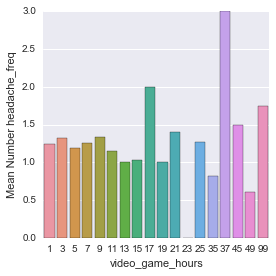

In [49]:
# bivariate bar graph
sns.factorplot(x="video_game_hours", y="headache_freq", data=df, kind="bar", ci=None)
plt.xlabel('video_game_hours')
plt.ylabel('Mean Number headache_freq')
plt.show()